In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import umap

/Users/ASK126/miniconda3/envs/voss2023/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ASK126/miniconda3/envs/voss2023/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ASK126/miniconda3/envs/voss2023/lib/python3.11/site-pac

In [2]:
images_f200 = np.load('./contrastive/image_CEERS_Marc_64pix_f200w.npy')
images_f356 = np.load('./contrastive/image_CEERS_Marc_64pix_f356w.npy')
cont = np.load('./contrastive/simclr_CEERS_Marc_batch_500_epochs_600.npy')
mags = pd.read_csv('./SE++/SE++_mags.csv')
ids = np.load('./contrastive/id_CEERS_Marc_64pix.npy')

In [3]:
ids

array(['nircam_1_1', 'nircam_1_4', 'nircam_1_33', ..., 'nircam_10_9290',
       'nircam_10_9291', 'nircam_10_9307'], dtype='<U14')

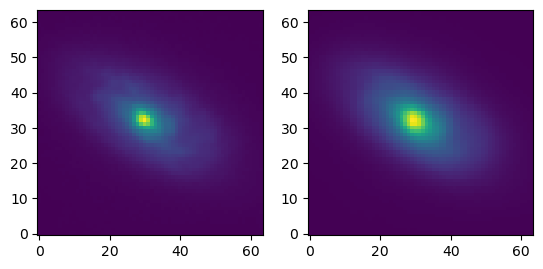

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(images_f200[:,:,0], origin='lower')
ax[1].imshow(images_f356[:,:,0], origin='lower')

In [5]:
mags

,index,flux_F115W,flux_F115W_err,mag_F115W,mag_F115W_err,sersic_effRpx_F115W,sersic_effRpx_F115W_err,sersic_F115W,sersic_F115W_err,flux_F150W,...,flux_F160W,flux_F160W_err,mag_F160W,mag_F160W_err,sersic_effRpx_F160W,sersic_effRpx_F160W_err,sersic_F160W,sersic_F160W_err,sersic_ratio,sersic_ratio_err
0,1,0.399709,0.023086,29.082159,0.062710,0.434735,0.370707,0.546655,2.408617,1.133193,...,0.257932,0.039239,27.409236,0.165173,0.779957,5.433722,0.941869,25.753107,0.570035,0.106577
1,2,5.092915,0.043340,26.319104,0.009239,1.185119,0.017268,1.378674,0.083339,4.762958,...,0.560031,0.043647,26.567469,0.084619,2.079401,1.180945,1.251427,2.768316,0.459916,0.009875
2,3,10.472642,0.093925,25.536379,0.009738,3.450695,0.036137,1.057103,0.027022,13.118560,...,1.808887,0.087135,25.294472,0.052300,4.466951,0.328084,0.888012,0.389374,0.769988,0.005217
3,4,4.588215,0.336455,26.432411,0.079617,8.612540,1.086681,2.156124,0.254111,3.800625,...,0.724847,0.185581,26.287385,0.277979,6.911721,2.480143,1.614205,1.493000,0.838003,0.021873
4,5,3.131672,0.261337,26.847079,0.090604,28.615197,8.117419,5.497237,0.363906,0.862152,...,0.335833,0.161759,27.122690,0.522961,11.231583,9.300892,0.301711,0.769990,0.475227,0.035748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45181,45182,236.924438,2.383194,22.149996,0.010921,7.524322,0.138908,5.500000,NaN,373.830811,...,56.120567,1.439387,21.565195,0.027847,9.355847,0.652918,5.500000,0.000013,0.614508,0.002454
45182,45183,15.562084,23.344921,25.106350,1.628730,92.705147,4545.548340,0.335777,5.356417,0.508758,...,0.478091,0.947149,26.739223,2.150959,12.397490,71.635727,2.211459,11.955904,0.648420,0.084042
45183,45184,18772.257812,0.000000,17.402729,0.000000,30.325176,0.000000,1.000000,0.000000,18772.257812,...,18772.257812,0.000000,15.254209,0.000000,30.325176,0.000000,1.000000,0.000000,0.457507,0.000000
45184,45185,1856.757690,4.893153,19.914633,0.002861,10.722090,0.053095,5.499687,0.001346,2360.103516,...,308.984467,2.334686,19.713158,0.008204,9.363276,0.200840,5.498477,0.021458,0.697089,0.001121


In [6]:
cont.shape

(24320, 1024)

In [7]:
64*64

4096

In [8]:
reducer = umap.UMAP()
lower_dimensional_space = reducer.fit_transform(cont)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
lower_dimensional_space.shape

(24320, 2)

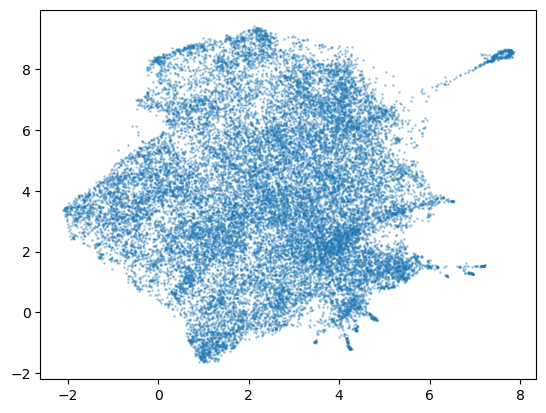

In [10]:
fig, ax = plt.subplots()

ax.scatter(lower_dimensional_space[:,0], lower_dimensional_space[:,1], s=1, alpha=0.3)

In [11]:
np.where(lower_dimensional_space[:,0]>7)

(array([  103,   348,   399,   693,   753,   807,   826,   829,  1045,
         1153,  1247,  1417,  1466,  1467,  1511,  1552,  1580,  1616,
         1619,  1679,  1680,  1725,  1728,  1975,  2124,  2135,  2544,
         2899,  3410,  3488,  3694,  4026,  4157,  4492,  4723,  4774,
         4778,  4840,  5016,  5022,  5113,  5119,  5128,  5402,  5457,
         5526,  5573,  5590,  5736,  5949,  6145,  6252,  6274,  6287,
         6322,  6323,  6458,  6630,  6805,  6880,  6881,  6958,  6985,
         6993,  7025,  7085,  7138,  7199,  7285,  7368,  7462,  7495,
         7534,  7581,  7706,  7792,  7832,  7850,  7922,  7943,  7958,
         7960,  7980,  8085,  8180,  8181,  8191,  8220,  8222,  8350,
         8563,  8708,  8844,  8878,  8922,  9215,  9400,  9435,  9458,
         9670, 10054, 10199, 10308, 10322, 10335, 10339, 10362, 10451,
        10625, 10731, 10883, 10888, 10892, 11037, 11274, 11304, 11413,
        11436, 11500, 11675, 11903, 11925, 12124, 12187, 12255, 12291,
      

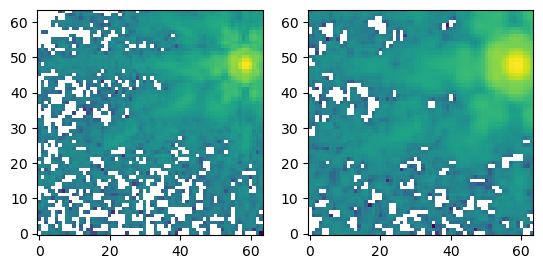

In [20]:
i = 20500
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(images_f200[:,:,i], origin='lower', norm='log')
ax[1].imshow(images_f356[:,:,i], origin='lower', norm='log')